Let's try to solve a linear system using our solver and compare the solution with the 
Julia \ solver.

To make sure the plot is up-to-date, click Cell -> Run All, once the kernel is ready (you should see in the top right Julia 0.4.6 with an empty circle to its right).

In [16]:
# Load the Julia file with code for our solver
include("getrf.jl")

getrs (generic function with 3 methods)

In [17]:
n = 64
srand(2016)
A = rand(n,n) # Matrix A
A0 = copy(A) # Save a copy
xe = rand(n) # This will be our solution
b = A * xe # This is our right-hand side b

64-element Array{Float64,1}:
 16.1807
 17.2128
 15.9813
 16.6667
 15.5791
 16.5639
 17.6728
 17.7844
 13.2205
 14.6619
 15.6964
 16.5813
 15.0775
  ⋮     
 15.8368
 14.9935
 17.1356
 14.0006
 17.5588
 17.1118
 16.8795
 17.3324
 16.3186
 17.6939
 15.2872
 17.0559

In [18]:
# Solve Ax = b using our solver
P = getrf!(A) # Factorization
# Solve
x = getrs(A, P, b)
# Print the error
@show norm(x-xe)
# The error should be small
norm(x-xe) < 1e-12 ? "SUCCESS" : "FAIL"

norm(x - xe) = 8.207641667577285e-14


"SUCCESS"

In [19]:
# Let's compare with Julia's solver
A = copy(A0) # Reset A to its original value
x_jl = A \ b
# Print the error
@show norm(x_jl-xe)
norm(x_jl-xe) < 1e-12 ? "SUCCESS" : "FAIL"

norm(x_jl - xe) = 1.0761402483469701e-13


"SUCCESS"

In [20]:
# Let's plot something
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [21]:
# 3D plot
n = 128
ts = linspace(0,8π,n) # Type \pi followed by TAB to get the pi symbol
x = ts .* cos(ts)
y = (0.1ts) .* sin(ts)
z = 1:n
plot(x,y,z,zcolor=reverse(z),m=(5,0.8,:rainbow,stroke(0)),leg=false,cbar=true,w=5)
# The spiral has a rainbow color.


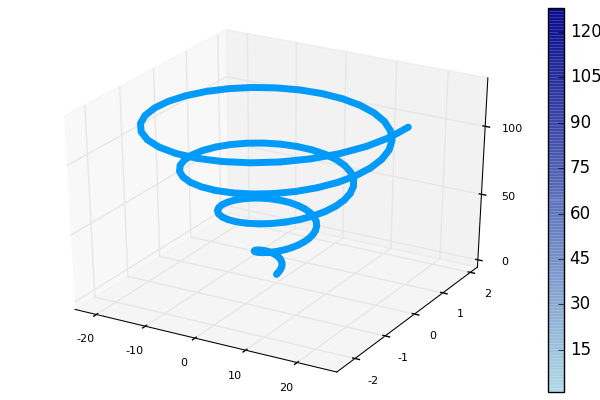

In [22]:
# Same plot but using PyPlot now
pyplot()
plot(x,y,z,zcolor=reverse(z),m=(5,0.8,:blues,stroke(0)),leg=false,cbar=true,w=5)
# The spiral is blue